# Exemplo de aplicação de Machine Learning Utilizando o Spark

### O objetivo desse estudo é mostrar a difirença entre o Spark dataframe e o RDD aplicando Machine Learning

In [1]:
import os
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()

'C:\\opt\\spark\\spark-3.1.1-bin-hadoop2.7'

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.rdd import RDD
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import Row

conf = pyspark.SparkConf().setAppName('SparkApp').setMaster('local[*]')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)
sc._conf.get('spark.driver.memory')

In [3]:
# Spark Session - usando quando se trabalha com Dataframes no Spark

spSession = SparkSession.builder.master('local').appName('DSA-SparkSQL').config('spark.some.config.option', 'some-value').getOrCreate()

In [4]:
# Carregando o arquivo CSV e mantendo o objeto em cache

carros = sc.textFile('C:/Users/skite/OneDrive/Documentos/GitHub/Spark/carros.csv')
carros.cache()

C:/Users/skite/OneDrive/Documentos/GitHub/Spark/carros.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [5]:
# Removendo a primeira linha (header)

primeiraLinha = carros.first()
linhas = carros.filter(lambda x: x != primeiraLinha)

In [6]:
linhas.count()

197

In [7]:
# Importando função row e função vectors

from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
import math

In [8]:
# Convertendo para vetor de linhas

def transformToNumeric(inputStr):
    attList = inputStr.split(',')
    doors = 1.0 if attList[3] == 'two' else 2.0
    body = 1.0 if attList[4] == 'sedan' else 2.0
    
    # Filtrando colunas não necessárias nesta etapa
    valores = Row(DOORS = doors, BODY = float(body), HP = float(attList[7]), RPM = float(attList[8]), MPG = float(attList[9]))
    return valores

In [9]:
autoMap = linhas.map(transformToNumeric)
autoMap.persist()
autoMap.collect()

[Row(DOORS=1.0, BODY=2.0, HP=69.0, RPM=4900.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=48.0, RPM=5100.0, MPG=47.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5000.0, MPG=30.0),
 Row(DOORS=1.0, BODY=2.0, HP=62.0, RPM=4800.0, MPG=35.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=60.0, RPM=5500.0, MPG=38.0),
 Row(DOORS=1.0, BODY=1.0, HP=69.0, RPM=5200.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5000.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=2.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=2.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=70.0, RPM=5400.0, MPG=38.0),
 Row(DOORS=1.0, BODY=2.0, HP=62.0, RPM=4800.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=58.0, RPM=4800.0, MPG=49.0),
 Row(DOORS=2.0

In [10]:
# Craindo o Dataframe a partir de uma RDD

carrosDf = spSession.createDataFrame(autoMap)
carrosDf.show()

+-----+----+----+------+----+
|DOORS|BODY|  HP|   RPM| MPG|
+-----+----+----+------+----+
|  1.0| 2.0|69.0|4900.0|31.0|
|  1.0| 2.0|48.0|5100.0|47.0|
|  1.0| 2.0|68.0|5000.0|30.0|
|  1.0| 2.0|62.0|4800.0|35.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|60.0|5500.0|38.0|
|  1.0| 1.0|69.0|5200.0|31.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|68.0|5000.0|31.0|
|  1.0| 2.0|68.0|5500.0|31.0|
|  2.0| 2.0|68.0|5500.0|31.0|
|  2.0| 2.0|68.0|5500.0|31.0|
|  1.0| 2.0|70.0|5400.0|38.0|
|  1.0| 2.0|62.0|4800.0|31.0|
|  1.0| 2.0|68.0|5500.0|31.0|
|  1.0| 2.0|58.0|4800.0|49.0|
|  2.0| 2.0|62.0|4800.0|31.0|
|  1.0| 2.0|76.0|6000.0|30.0|
|  2.0| 1.0|70.0|5400.0|38.0|
+-----+----+----+------+----+
only showing top 20 rows



In [11]:
# Aplicando técnicas de normalização e escala

summStats = carrosDf.describe().toPandas()
medias = summStats.iloc[1,1:5].values.tolist()
desvios_padroes = summStats.iloc[2,1:5].values.tolist()

In [12]:
# Inserindo a média e o desvio padrão em uma variável do tipo Broadcast

bcMedias = sc.broadcast(medias)
bcDesviosP = sc.broadcast(desvios_padroes)

In [13]:
# Agora vamos fazer uma função qe irá padronizar os nossos dados

def centerAndScale(inRow):
    global bcMedias
    global bcDesviosP
    
    meanArray = bcMedias.value
    stdArray = bcDesviosP.value
    
    retArray = []
    for i in range(len(meanArray)):
        retArray.append((float(inRow[i])-float(meanArray[i])) / float(stdArray[i]))
    return Vectors.dense(retArray)

In [14]:
csAuto = carrosDf.rdd.map(centerAndScale)
csAuto.collect()

[DenseVector([-1.145, 0.9337, -0.9194, -0.4532]),
 DenseVector([-1.145, 0.9337, -1.4773, -0.0375]),
 DenseVector([-1.145, 0.9337, -0.9459, -0.2453]),
 DenseVector([-1.145, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -1.1585, 0.7941]),
 DenseVector([-1.145, -1.0656, -0.9194, 0.1704]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.9459, -0.2453]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([0.869, 0.9337, -0.9459, 0.7941]),
 DenseVector([0.869, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.8928, 0.5862]),
 DenseVector([-1.145, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -1.2116, -0.6611]),
 DenseVector([0.869, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.7334, 1.8335]),
 DenseVector([0.869, -1.0656, -0.8928, 0.5862]),
 DenseVector([

In [16]:
# Criando um Spark Dataframe

autoRows = csAuto.map(lambda f: Row(features = f))
autoDf = spSession.createDataFrame(autoRows)
autoDf.select('features').show(10)

+--------------------+
|            features|
+--------------------+
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
+--------------------+
only showing top 10 rows



In [19]:
# Importando o K-Means para clusterização

from pyspark.ml.clustering import KMeans
kmeans = KMeans(k = 3, seed = 1)
modelo = kmeans.fit(autoDf)
previsoes = modelo.transform(autoDf)
previsoes.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         0|
|[0.86895117361793...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         1|
+--------------------+----------+
only showing top 20 rows



In [20]:
# Polotando o resultado

import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [21]:
def unstripData(instr):
    return(instr['prediction'], instr['features'][0], instr['features'][1], instr['features'][2], instr['features'][3])

In [24]:
# Organizando os dados para plot

unstripped = previsoes.rdd.map(unstripData)
predList = unstripped.collect()
predPd = pd.DataFrame(predList)

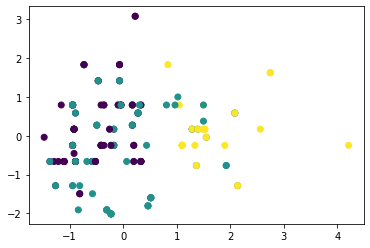

In [25]:
plt.cla()
plt.scatter(predPd[3], predPd[4], c = predPd[0])